### Simple animation of diifusing molecule in two dimensions

Does two things:

1) Plots position of molecule in $xy$ plane as blue dot, to show what a random walk looks like

2) Plots distance from the origin $r=\sqrt{x^2+y^2}$ as a function of time, for longer run, to show that $r$ fluctuates (as it is random!) but fluctuates around an average trend $\sim t^{1/2}$. This is just an example of the Central Limit Theorem (CLT) of statistics.

Python code below plots a diffusing molecule (as a red dot) over a short period of time.

Accompanying notes at [Biological Physics Lecture 4 notes](http://personal.ph.surrey.ac.uk/~phs1rs/teaching/BPlecture4.pdf)


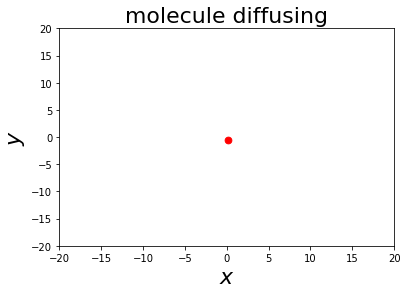

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from random import uniform
import time
#########################
## build square wave
n_pts=151
x=0.0
y=0.0
for iteration in range(n_pts):
    clear_output(wait=True)
# Fourier series
    x=x+uniform(-1,1)
    y=y+uniform(-1,1)
#
    plt.scatter(x , y,s=50,color='red')
    plt.xlim([-20.0 , 20.0])
    plt.ylim([-20.0,20.0])
    plt.xlabel('$x$',fontsize=22)
    plt.ylabel('$y$',fontsize=22)
    plt.title('molecule diffusing',fontsize=22)
    plt.show() 
    time.sleep(0.01)


Above plot shows molecule moving at random, note that {\it on average} it is moving away from its starting point at the origin, but that as motion is random sometimes it moves towards the origin and sometimes away.

Now, plot RMS (root mean square) distance of the diffusing molecule from the origin, as a function of time. The code below does this.

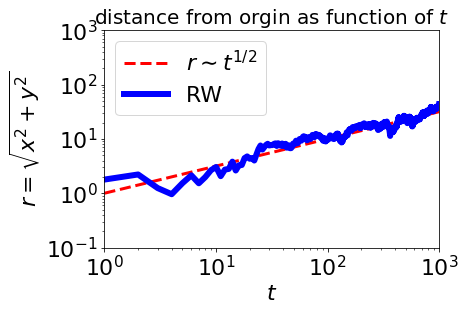

In [20]:
n_pts=1001
x=0.0
y=0.0
t=np.linspace(0,n_pts,n_pts)
r=np.zeros(n_pts)
for i in range(0,n_pts):
# Fourier series
    x=x+uniform(-1,1)
    y=y+uniform(-1,1)
    r[i]=np.sqrt(x**2+y**2)
#
    if(i%20 ==0):
        clear_output(wait=True)
        plt.loglog([1.0,float(n_pts-1)] , [1.0,np.sqrt(float(n_pts-1))],linewidth=3,color='red',ls='--',label='$r\sim t^{1/2}$')
        plt.loglog(t[0:i] , r[0:i],linewidth=6,color='blue',label='RW')
        plt.xlim([1.0 , float(n_pts-1)])
        plt.ylim([0.1,1000.00])
        plt.xticks(fontsize=22)
        plt.yticks(fontsize=22)
        plt.ylabel('$r=\sqrt{x^2+y^2}$',fontsize=22)
        plt.xlabel('$t$',fontsize=22)
        plt.legend(loc=2,fontsize=22)
        plt.title('distance from origin as function of $t$',fontsize=18)
        if(i==n_pts-1): plt.savefig('diffusion_rms_v_t.png',dpi=600)
        plt.show() 
        time.sleep(0.01)

The $t^{1/2}$ dependence (on average, note that the random trajectory fluctuates around the $t^{1/2}$ dashed line) of the RMS distance from the origin, comes from the CLT.

CLT is a very general powerful theorem at the heart of statistics. Here in one dimension (eg for motion along the $x$ axis) it tells us that the RMS (= Root Mean Square) sum of $N$ random steps of size $\delta$ that are equally likely to be backward as forward is $N^{1/2}\delta$, i.e., proportional to the square root of the number of steps, as opposed to being linear in the number of steps. The math definition of [CLT](https://en.wikipedia.org/wiki/Central_limit_theorem) is quite hairy. But here we can just write


RMS distance travelled $=N^{1/2}\delta$


Note that we are using the RMS, if each step is as likely to be backward as forward, then the mean of the sum of the $N$ steps is zero.

